In [66]:
import os
import time

import duckdb
import pandas as pd
import plotly.express as px
import pyarrow.parquet as pq

from common.env_variables import DUCKDB_DWH_FILE, CURATED_DIR, DATA_SOURCE_NAME
from common.storage import load_cleansed_df
from common.entity import SITEMAP, JOB_ONLINE

In [67]:
conn = duckdb.connect(DUCKDB_DWH_FILE)

In [68]:
entity = JOB_ONLINE

In [69]:
start_time = time.time()
df = conn.execute(f'''
SELECT *
FROM src_{entity.name}
WHERE
    year = 2022 AND
    month = 9 AND
    day = 1
;
''').df()
print("--- %s seconds ---" % (time.time() - start_time))
print(df)

--- 0.2303760051727295 seconds ---
         job_id      load_timestamp  online_at  \
0       8658436 2022-09-01 23:00:00 2022-09-01   
1       8658437 2022-09-01 23:00:00 2022-09-01   
2       8658438 2022-09-01 23:00:00 2022-09-01   
3       8658440 2022-09-01 23:00:00 2022-09-01   
4       8658442 2022-09-01 23:00:00 2022-09-01   
...         ...                 ...        ...   
142424  8658428 2022-09-01 23:00:00 2022-09-01   
142425  8658429 2022-09-01 23:00:00 2022-09-01   
142426  8658433 2022-09-01 23:00:00 2022-09-01   
142427  8658434 2022-09-01 23:00:00 2022-09-01   
142428  8658435 2022-09-01 23:00:00 2022-09-01   

                                                      url  \
0       https://www.stepstone.de/stellenangebote--Kons...   
1       https://www.stepstone.de/stellenangebote--Elek...   
2       https://www.stepstone.de/stellenangebote--Team...   
3       https://www.stepstone.de/stellenangebote--IT-S...   
4       https://www.stepstone.de/stellenangebote--Ener...  

In [70]:
start_time = time.time()
df = conn.execute(f'''
SELECT *
FROM count_job_online_by_date
;
''').df()
print("--- %s seconds ---" % (time.time() - start_time))
print(df)

--- 0.7464067935943604 seconds ---
     online_at    jobs
0   2021-10-09  113858
1   2021-10-10  111325
2   2021-10-11  111745
3   2021-10-12  114141
4   2021-10-13  116319
..         ...     ...
338 2022-09-12  135524
339 2022-09-13  138533
340 2022-09-14  141175
341 2022-09-15  140990
342 2022-09-16  141605

[343 rows x 2 columns]


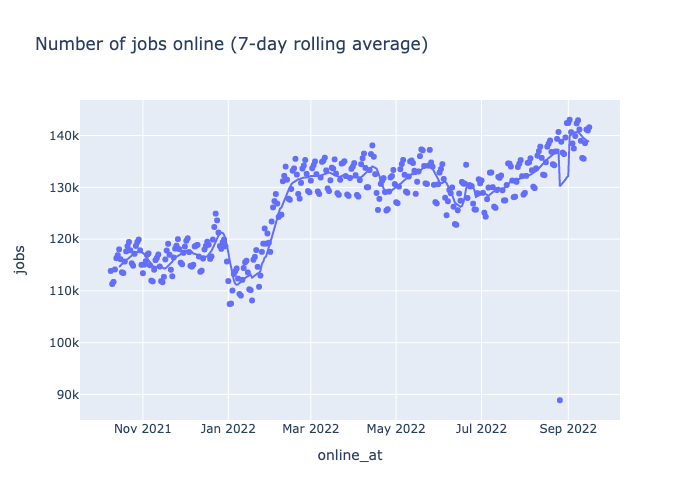

In [71]:
fig = px.scatter(df, x="online_at", y="jobs", trendline="rolling", trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show("png")


In [72]:
conn.close()